# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
import requests
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

    
# Print the city count to confirm sufficient count
print(len(cities))
# #print(cities)
# print("*******************************************************************************************")
# print("Temporarily reducging cities from cities to cities[0:30] so only get 30 cities intially")
# print("before calling api.openweathermap.org since they have limits") 
# print("I believe 60 calls/minute and 1M calls/month per month)")
# cities = cities[0:30]
# print("*******************************************************************************************")
# print(cities)

625


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up lists to hold reponse info
lat = []
lon = []
temp = []
temp_max = []
humidity=[]
clouds=[]
wind=[]
del_cities = []
del_cities_index = []
i = 0
city_counter=0
number_valid_cities=1

#print("cities")
#print(cities)
# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("---------------------------------")
for city in cities:
    #print(f'city is {city}')
    try:
        response = requests.get(query_url + city).json()
        time.sleep(0.01)
        lat.append(response['coord']['lat'])
        #print(f"The latitude information for city {city} #{city_counter} received is: {lat}")
        lon.append(response['coord']['lon'])
        #print(f"The longitude information for city {city} #{city_counter} received is: {lon}")
        temp.append(response['main']['temp'])
        #print(f"The temperature information for city {city} #{city_counter} received is: {temp}")
        temp_max.append(response['main']['temp_max'])
        #print(f"The temperature Maximum information for city {city} #{city_counter} received is: {temp_max}")
        humidity.append(response['main']['humidity'])
        #print(f"The humidty information for city {city} #{city_counter} received is: {humidity}")
        clouds.append(response['clouds']['all'])
        #print(f"The cloudiness information for city {city} #{city_counter} received is: {clouds}")
        wind.append(response['wind']['speed'])
        #print(f"The windiness information for city {city} #{city_counter} received is: {wind}")
        print(f'Processing city #{number_valid_cities} for city named {city}')
        number_valid_cities += 1
        
    except KeyError:
        print()
        print("Oops! City not found, removing the invalid city from cities")
        #print(f'Issue with {city} of index {city_counter}')
        del_cities_index.append(city_counter)
        #print('len(del_cities_index)')
        #print(len(del_cities_index))        
        
    city_counter+=1
#print('cities')
#print(cities)

#print('len(del_cities_index)')
#print(len(del_cities_index))

if len(del_cities_index)>0:
    #print("inside if")
    for i in range(len(del_cities_index)-1, -1, -1):
        #print("inside for")
        #print(f'i={i}')
        #print(f'del_cities_index[i]')
        #print(del_cities_index[i])
        j=int((del_cities_index[i]))
        #print(f'j={j}')
        del cities[j]
#print('cities after del')
#print(cities)

# from the list
#print(f'cities is now {cities}')
#print()
    
# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city  

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

print("---------------------------------")
print("Data Retrevial Complete")
print("---------------------------------")

# Get the temperature from the response
# print(f"The weather API responded with: {weather_json}.")

Beginning Data Retrieval
---------------------------------
Processing city #1 for city named new norfolk
Processing city #2 for city named mataura
Processing city #3 for city named peniche
Processing city #4 for city named port said
Processing city #5 for city named ancud
Processing city #6 for city named zaysan
Processing city #7 for city named mar del plata
Processing city #8 for city named mahajanga
Processing city #9 for city named port lincoln
Processing city #10 for city named pacific grove
Processing city #11 for city named yellowknife
Processing city #12 for city named the valley
Processing city #13 for city named codrington
Processing city #14 for city named oksfjord
Processing city #15 for city named talnakh
Processing city #16 for city named kapaa
Processing city #17 for city named bandarbeyla
Processing city #18 for city named tuktoyaktuk
Processing city #19 for city named troitsko-pechorsk
Processing city #20 for city named goundi
Processing city #21 for city named alice s

Processing city #167 for city named bambous virieux

Oops! City not found, removing the invalid city from cities
Processing city #168 for city named saint george
Processing city #169 for city named vostok
Processing city #170 for city named ciudad bolivar
Processing city #171 for city named tumba

Oops! City not found, removing the invalid city from cities
Processing city #172 for city named talara

Oops! City not found, removing the invalid city from cities
Processing city #173 for city named saravan
Processing city #174 for city named pisco
Processing city #175 for city named makakilo city

Oops! City not found, removing the invalid city from cities
Processing city #176 for city named kaitangata
Processing city #177 for city named palmer
Processing city #178 for city named ozubulu
Processing city #179 for city named srednekolymsk
Processing city #180 for city named korla
Processing city #181 for city named kodiak
Processing city #182 for city named olafsvik
Processing city #183 for c

Processing city #323 for city named portland
Processing city #324 for city named gornopravdinsk
Processing city #325 for city named bay saint louis
Processing city #326 for city named matara

Oops! City not found, removing the invalid city from cities
Processing city #327 for city named astoria
Processing city #328 for city named dunedin
Processing city #329 for city named mogadishu
Processing city #330 for city named sinnamary
Processing city #331 for city named hami
Processing city #332 for city named georgiyevskoye

Oops! City not found, removing the invalid city from cities
Processing city #333 for city named vanavara
Processing city #334 for city named cuamba
Processing city #335 for city named anadyr
Processing city #336 for city named kloulklubed
Processing city #337 for city named port augusta
Processing city #338 for city named krasnoselkup
Processing city #339 for city named saint anthony
Processing city #340 for city named provideniya
Processing city #341 for city named hali

Processing city #495 for city named mashhad
Processing city #496 for city named byron bay
Processing city #497 for city named lavrentiya
Processing city #498 for city named serebryansk
Processing city #499 for city named hope
Processing city #500 for city named quatre cocos
Processing city #501 for city named rondonopolis
Processing city #502 for city named bilibino
Processing city #503 for city named la rioja
Processing city #504 for city named aliwal north
Processing city #505 for city named leh

Oops! City not found, removing the invalid city from cities
Processing city #506 for city named gerash
Processing city #507 for city named mahibadhoo
Processing city #508 for city named kharp
Processing city #509 for city named buarcos
Processing city #510 for city named ranong
Processing city #511 for city named moree

Oops! City not found, removing the invalid city from cities
Processing city #512 for city named dandong
Processing city #513 for city named slidell
Processing city #514 for c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

 # create a data frame from cities, lat, temp, etc
#print(f'City {cities}')
#print(f'Lat {lat}')
      
weather_dict = {
    "city": cities,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "TempMax": temp_max,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed":wind 
}

# print("weather_dict")
# print(weather_dict)
# print()

weather_data = pd.DataFrame(weather_dict)
# print(weather_data)

# Save as a csv
weather_data.to_csv(output_data_file, encoding="utf-8", index=False)

# Display the DataFrame
weather_data.head()

,city,lat,lon,temp,TempMax,Humidity,Cloudiness,Wind Speed
0,new norfolk,-42.7826,147.0587,19.96,22.64,38,7,1.34
1,mataura,-46.1927,168.8643,23.44,23.44,55,18,2.45
2,peniche,39.3558,-9.3811,11.31,13.68,82,79,3.55
3,port said,31.2565,32.2841,12.93,12.93,67,88,10.04
4,ancud,-41.8697,-73.8203,9.43,9.57,77,86,3.19


In [5]:
# Display the DataFrame
weather_data.describe()

,lat,lon,temp,TempMax,Humidity,Cloudiness,Wind Speed
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,19.100026,20.251039,10.713155,11.105828,70.850000,54.393103,3.589517
std,33.093442,90.388827,17.110620,17.081103,21.993717,39.760995,2.673556
min,-54.800000,-179.166700,-41.480000,-41.480000,9.000000,0.000000,0.000000
25%,-8.392275,-60.219050,0.780000,1.565000,58.750000,9.000000,1.540000
50%,21.580600,25.193850,15.955000,16.510000,76.500000,58.500000,3.000000
75%,45.476750,99.809975,24.085000,24.202500,88.000000,98.000000,4.882500
max,78.218600,179.316700,36.870000,36.870000,100.000000,100.000000,16.460000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 


In [6]:
cities_high_humidity = []
city_counter=0
for city in cities:
    if int(humidity[city_counter]) >100:
        #print(f"The humidty information for city {city} #{city_counter} received is: {humidity[city_counter]}")
        # Create a new list to track high humifity index values
        cities_high_humidity.append(city_counter)
        #print(f"{city} with city_counter of {city_counter} has humidty >80 so need to remove later")
        city_counter+=1
    else:
        # print("Skip since no humidity >100")
        city_counter+=1
#print("Latest cities_high_humidity")
#print(cities_high_humidity)

In [7]:
#  Get the indices of cities that have humidity over 100%.
#print("Latest cities_high_humidity")
cities_high_humidity

[]

In [8]:
# Make a new DataFrame equal to the city data (aka weather_data) to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_data
if len(cities_high_humidity) > 0:
    print(f"have high humidity data for city index #(s) {cities_high_humidity}")
    # dropping a row(s) from actual dataframe
    #df.drop(['c', 'd'], inplace = True )
    clean_city_data=clean_city_data.drop(cities_high_humidity, inplace=False) 
# else:
#     print("No high humidity data") 
# print("weather_data") 
# print(weather_data)
# print()
# print("clean_city_data") 
# print(clean_city_data)
# print()

clean_city_data.reset_index(inplace=True)
#print("clean_city_data after reset index") 
clean_city_data


,index,city,lat,lon,temp,TempMax,Humidity,Cloudiness,Wind Speed
0,0,new norfolk,-42.7826,147.0587,19.96,22.64,38,7,1.34
1,1,mataura,-46.1927,168.8643,23.44,23.44,55,18,2.45
2,2,peniche,39.3558,-9.3811,11.31,13.68,82,79,3.55
3,3,port said,31.2565,32.2841,12.93,12.93,67,88,10.04
4,4,ancud,-41.8697,-73.8203,9.43,9.57,77,86,3.19
...,...,...,...,...,...,...,...,...,...
575,575,sosnovo-ozerskoye,52.5249,111.5418,-17.24,-17.24,88,100,4.12
576,576,kilindoni,-7.9139,39.6668,27.45,27.45,77,100,5.12
577,577,tanout,14.9709,8.8879,14.49,14.49,11,37,5.98
578,578,vangaindrano,-23.3500,47.6000,26.65,26.65,83,32,1.83


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

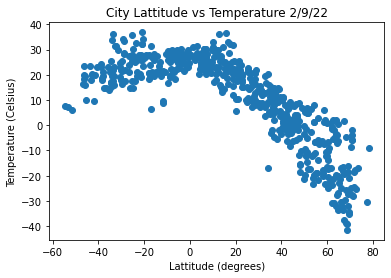

In [9]:
# print("clean_city_data") 
# print(clean_city_data)

# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["temp"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('City Lattitude vs Temperature 2/9/22')
# Save the figure
plt.savefig("output_data/lat_temp.png")
# Display the garph
plt.show()

## Latitude vs. Humidity Plot

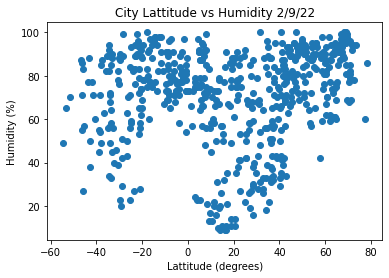

In [10]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Humidity"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Humidity (%)")
plt.title('City Lattitude vs Humidity 2/9/22')

# Save the figure
plt.savefig("output_data/lat_hum.png")
# Display the garph
plt.show()

## Latitude vs. Cloudiness Plot

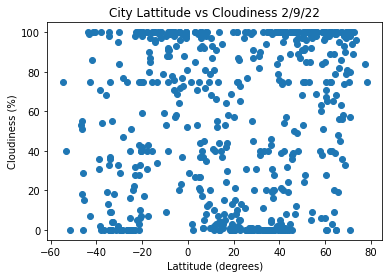

In [11]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Cloudiness"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.title('City Lattitude vs Cloudiness 2/9/22')
# Save the figure
plt.savefig("output_data/lat_cloud.png")
# Display the garph
plt.show()

## Latitude vs. Wind Speed Plot

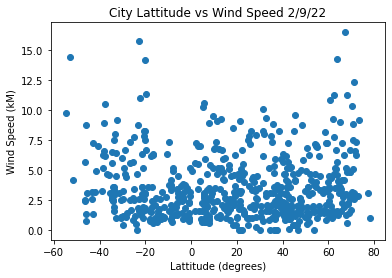

In [12]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Wind Speed"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Wind Speed (kM)")
plt.title('City Lattitude vs Wind Speed 2/9/22')
# Save the figure
plt.savefig("output_data/lat_wind.png")
# Display the garph
plt.show()

## Linear Regression

The correlation between both factors is -0.79
The r-value is: -0.7857787117219475
line_eq is: y = -0.41x + 18.47


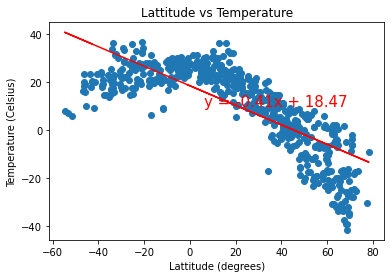

In [13]:
# Calculate the correlation coefficient and linear regression model 

x_values = clean_city_data["lat"]
y_values = clean_city_data["temp"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('Lattitude vs Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.886962528283415
line_eq is: y = -0.76x + 34.1


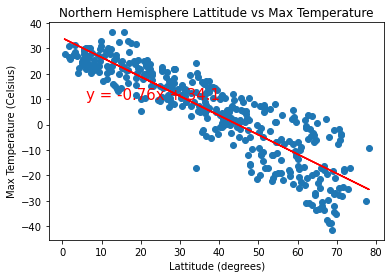

In [14]:
# Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
# Southern Hemisphere (less than 0 degrees latitude)
# After each pair of plots, take the time to explain what the linear regression is modeling. 
# For example, describe any relationships you notice and any other analysis you may have.

# Set-up and initialize variables 
city_counter = 0
northern_city_counter = 0
southern_city_counter = 0
northern_hemisphere_city = []
southern_hemisphere_city = []
      
# Make a new DataFrame equal to the city data (aka weather_data) to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
northern_hemisphere_data = clean_city_data
southern_hemisphere_data = clean_city_data

# Create Northen Hemisphere and Southern Hemisphere lists
for city_counter in range(0, len(clean_city_data)):
    if clean_city_data["lat"][city_counter] >= 0:
        #print('northern_hemisphere_city')
        #print(f'Latitude for Northen Hemisphere city {clean_city_data["city"][city_counter]}') 
        #print(' #{city_counter} received is: {lat}')
        ##print(f'Lattitude for city {city[city_counter]} #{city_counter} is Northen Hemisphere: {clean_city_data["lat"][city_counter]}')
        northern_hemisphere_city.append(city_counter)

        # Drop southern_hemisphere_data point from northern_hemisphere_data    
        southern_hemisphere_data=southern_hemisphere_data.drop(city_counter, inplace=False)

    else:
        # Southern_hemisphere_city
        southern_hemisphere_city.append(city_counter)

        # Drop southern_hemisphere_data point from northern_hemisphere_data      
        northern_hemisphere_data=northern_hemisphere_data.drop(city_counter, inplace=False)

    city_counter += 1 
                    
x_values = northern_hemisphere_data["lat"]
y_values = northern_hemisphere_data["TempMax"]

correlation = st.pearsonr(x_values,y_values)
#print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
#print("slope, intercept, rvalue, pvalue, stderr")
#print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Max Temperature (Celsius)")
plt.title('Northern Hemisphere Lattitude vs Max Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.36
The r-value is: 0.36068327142588424
line_eq is: y = 0.82x + -40.95


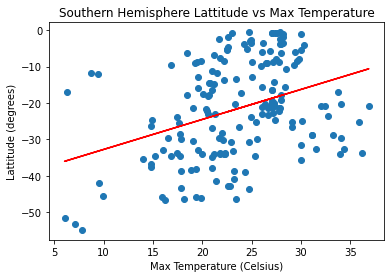

In [15]:
x_values = southern_hemisphere_data["TempMax"]
y_values = southern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')

# print("slope, intercept, rvalue, pvalue, stderr")
# print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Max Temperature (Celsius)")
plt.ylabel("Lattitude (degrees)")
plt.title('Southern Hemisphere Lattitude vs Max Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.42
The r-value is: 0.41670933046364766
line_eq is: y = 0.36x + 12.62


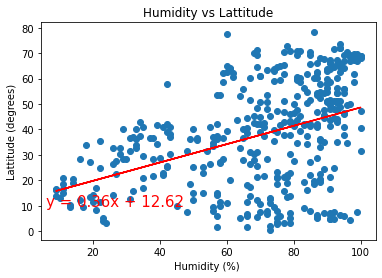

In [16]:
x_values = northern_hemisphere_data["Humidity"]
y_values = northern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
# print("slope, intercept, rvalue, pvalue, stderr")
# print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Humidity (%) ")
plt.ylabel("Lattitude (degrees)")
plt.title('Humidity vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.33
The r-value is: 0.33386323238769916
line_eq is: y = 0.25x + -39.79


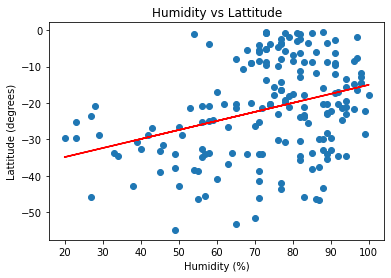

In [17]:
x_values = southern_hemisphere_data["Humidity"]
y_values = southern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
# print("slope, intercept, rvalue, pvalue, stderr")
# print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Humidity (%)")
plt.ylabel("Lattitude (degrees)")
plt.title('Humidity vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
time.sleep(0.5)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.31
The r-value is: 0.30523038430695976
line_eq is: y = 0.6x + 31.04


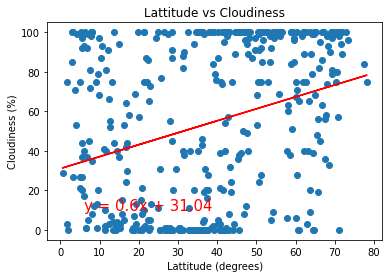

In [18]:
y_values = northern_hemisphere_data["Cloudiness"]
x_values = northern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
# print("slope, intercept, rvalue, pvalue, stderr")
# print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Lattitude (degrees)")
plt.title('Lattitude vs Cloudiness')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.46
The r-value is: 0.4584306003358822
line_eq is: y = 1.33x + 84.36


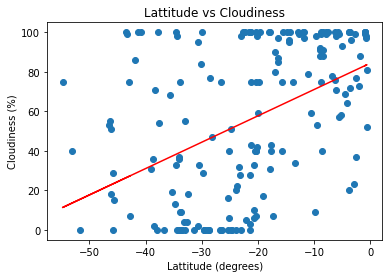

In [19]:
y_values = southern_hemisphere_data["Cloudiness"]
x_values = southern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Lattitude (degrees)")
plt.title('Lattitude vs Cloudiness')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.42
The r-value is: 0.41670933046364766
line_eq is: y = 0.36x + 12.62


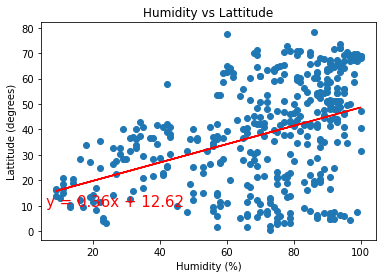

In [20]:
x_values = northern_hemisphere_data["Humidity"]
y_values = northern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Humidity (%)")
plt.ylabel("Lattitude (degrees)")
plt.title('Humidity vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.33
The r-value is: 0.33386323238769916
line_eq is: y = 0.45x + 83.39


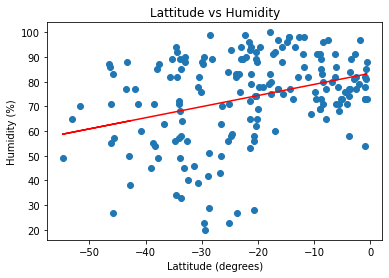

In [21]:
y_values = southern_hemisphere_data["Humidity"]
x_values = southern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Humidity (%)")
plt.xlabel("Lattitude (degrees)")
plt.title('Lattitude vs Humidity')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()